In [110]:
from ROOT import TFile
from ROOT import gDirectory
from ROOT import TCanvas
from ROOT import TGraphErrors
from ROOT import TMultiGraph
from ROOT import TLegend

In [111]:
mlfit = TFile('mlfit.root', 'READ')
mlfit.ls()

TFile**		mlfit.root	
 TFile*		mlfit.root	
  KEY: RooFitResult	nuisances_prefit_res;1	
  KEY: TProcessID	ProcessID0;1	195309dc-acfd-11e8-9717-66358a89beef
  KEY: RooArgSet	nuisances_prefit;1	Set of RooAbsArg objects
  KEY: TDirectoryFile	shapes_prefit;1	shapes_prefit
  KEY: RooArgSet	norm_prefit;1	Set of RooAbsArg objects
  KEY: RooFitResult	fit_b;1	
  KEY: TDirectoryFile	shapes_fit_b;1	shapes_fit_b
  KEY: RooArgSet	norm_fit_b;1	Set of RooAbsArg objects
  KEY: RooFitResult	fit_s;1	
  KEY: TDirectoryFile	shapes_fit_s;1	shapes_fit_s
  KEY: RooArgSet	norm_fit_s;1	Set of RooAbsArg objects
  KEY: TTree	tree_fit_sb;1	tree_fit_sb
  KEY: TTree	tree_fit_b;1	tree_fit_b


In [149]:
prefit_hists = {'total_background':[], 'ewk':[], 'qcd':[], 'zgg':[]}
postfit_hists = {'total_background':[], 'ewk':[], 'qcd':[], 'zgg':[]}

for i in [1,2,3,4,5,6]:

    mlfit.cd('shapes_prefit/ch1_bin'+str(i))

    prefit_hists['total_background'].append(gDirectory.Get('total_background;1'))
    prefit_hists['ewk'].append(gDirectory.Get('ewk;1'))
    prefit_hists['qcd'].append(gDirectory.Get('qcd;1'))
    prefit_hists['zgg'].append(gDirectory.Get('zgg;1'))
    
    mlfit.cd('shapes_fit_b/ch1_bin'+str(i))
    
    postfit_hists['total_background'].append(gDirectory.Get('total_background;1'))
    postfit_hists['ewk'].append(gDirectory.Get('ewk;1'))
    postfit_hists['qcd'].append(gDirectory.Get('qcd;1'))
    postfit_hists['zgg'].append(gDirectory.Get('zgg;1'))


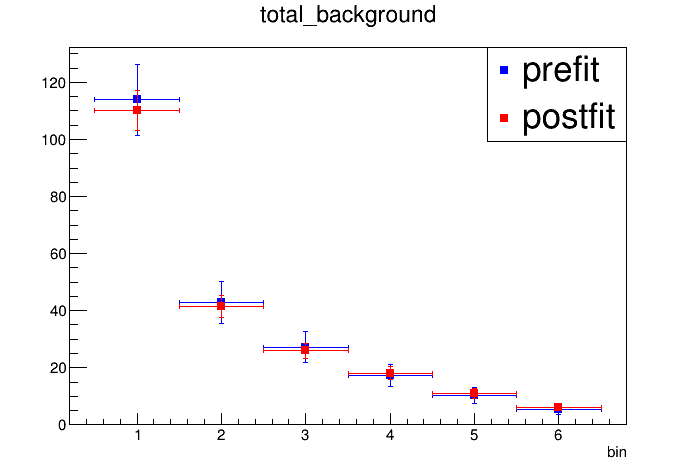

In [150]:
from array import array

channel = 'total_background'
#channel = 'ewk'
#channel = 'qcd'
#channel = 'zgg'

X = array('f')
Xerr = array('f')

Ypre = array('f')
Ypre_err = array('f')

Ypost = array('f')
Ypost_err = array('f')

for i in range(0,6):
    
    X.append(i+1)
    Xerr.append(0.5)
    
    hpre = prefit_hists[channel][i]
    
    Ypre.append(hpre.GetBinContent(1))
    Ypre_err.append(hpre.GetBinError(1))

    hpost = postfit_hists[channel][i]
    
    Ypost.append(hpost.GetBinContent(1))
    Ypost_err.append(hpost.GetBinError(1))
    
    
c1 = TCanvas()    

gr_pre = TGraphErrors(6, X, Ypre, Xerr, Ypre_err)
gr_pre.SetMarkerColor(4)
gr_pre.SetMarkerStyle(21)
gr_pre.SetLineColor(4)

gr_post = TGraphErrors(6, X, Ypost, Xerr, Ypost_err)
gr_post.SetMarkerColor(2)
gr_post.SetMarkerStyle(21)
gr_post.SetLineColor(2)

mg = TMultiGraph()
mg.Add(gr_pre, 'p')
mg.Add(gr_post, 'p')

mg.SetTitle(channel)
mg.SetTitle(channel+';bin')

leg = TLegend(0.7, 0.7, 0.9, 0.9) 
leg.SetFillColor(0) 
leg.AddEntry(gr_pre, 'prefit', 'p')
leg.AddEntry(gr_post, 'postfit', 'p')

mg.Draw('a')
leg.Draw()

c1.Draw()


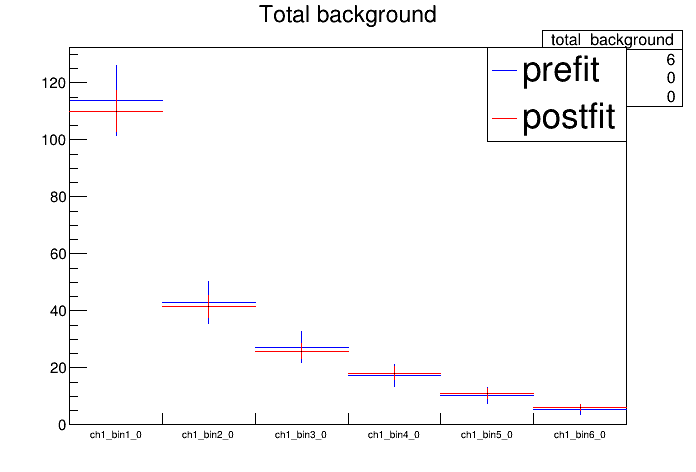

In [151]:
mlfit.cd('shapes_prefit')
total_pre = gDirectory.Get('total_background')
total_pre.SetLineColor(4)

mlfit.cd('shapes_fit_b')
total_post = gDirectory.Get('total_background')
total_post.SetLineColor(2)

c2 = TCanvas()    

total_pre.Draw()
total_post.Draw('same')

leg = TLegend(0.7, 0.7, 0.9, 0.9) 
leg.SetFillColor(0) 
leg.AddEntry(total_pre, 'prefit', 'l')
leg.AddEntry(total_post, 'postfit', 'l')

leg.Draw()

c2.Draw()
